In [1]:
import pandas as pd
from pyaxis import pyaxis
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

ModuleNotFoundError: No module named 'pyaxis'

In [2]:
!pip install pyaxis

/bin/sh: /usr/local/bin/pip: /usr/local/opt/python/bin/python3.6: bad interpreter: No such file or directory


In [339]:
# Die Daten werden importiert. 
url = 'https://www.bfs.admin.ch/bfsstatic/dam/assets/7666602/master'

px = pyaxis.parse(url, encoding='ISO-8859-1')
df_roh = pd.DataFrame(px['DATA'])

In [342]:
# Die Daten werden aufbereitet. 
df = df_roh[df_roh['DATA'] != '\"...\"']
df['DATA'] = df['DATA'].apply(lambda x: int(x))

df_aktuell = df[df['Schuljahr'] == '2017/18']

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Auswertungen

In [282]:
# Wie viele Lehrkräfte gibts insgesamt in der Schweiz?
df_temp = df_aktuell[df_aktuell['Bildungsstufe'].str.contains('Total')]
df_temp = df_temp[df_temp['Kanton'] == 'Schweiz']
df_temp['DATA'].sum()

118017

In [288]:
# Wie viele Lehrerinnen bzw. Lehrer gibts in der Schweiz an öffentlichen Schulen? 
df_temp = df_aktuell[df_aktuell['Bildungsstufe'].str.contains('Total')]
df_temp = df_temp[df_temp['Kanton'] == 'Schweiz']
df_temp['prozent'] = round(100 * df_temp['DATA'] / df_temp['DATA'].sum()).astype('int')
df_temp

,Schuljahr,Kanton,Geschlecht,Bildungsstufe,DATA,prozent
4158,2017/18,Schweiz,Mann,Bildungsstufe - Total,36593,31
4169,2017/18,Schweiz,Frau,Bildungsstufe - Total,81424,69


In [289]:
# Wie viele Lehrkräfte gibts insgesamt an der Primarstufe? 
df_temp = df_aktuell[df_aktuell['Bildungsstufe'].str.contains('Primarstufe')]
df_temp = df_temp[df_temp['Kanton'] == 'Schweiz']
df_temp['DATA'].sum()

63026

In [290]:
# Wie viele Lehrkräfte an der Primarstufe sind männlich/ weiblich?
df_temp = df_aktuell[df_aktuell['Bildungsstufe'].str.contains('Primarstufe')]
df_temp = df_temp[df_temp['Kanton'] == 'Schweiz']
df_temp = df_temp.groupby(by='Geschlecht')[['DATA']].sum()
df_temp['prozent'] = round(100 * df_temp['DATA'] / df_temp['DATA'].sum()).astype('int')
df_temp

,DATA,prozent
Geschlecht,,
Frau,54252,86
Mann,8774,14


In [291]:
# Wie viele Lehrkräfte an der Sekundarstufe I sind männlich/ weiblich?
df_temp = df_aktuell[df_aktuell['Bildungsstufe'].str.contains('Sekundarstufe I')]
df_temp = df_temp[df_temp['Kanton'] == 'Schweiz']
df_temp = df_temp.groupby(by='Geschlecht')[['DATA']].sum()
df_temp['prozent'] = round(100 * df_temp['DATA'] / df_temp['DATA'].sum()).astype('int')
df_temp

,DATA,prozent
Geschlecht,,
Frau,28746,50
Mann,28396,50


In [292]:
# Wie viele Lehrkräfte an der Sekundarstufe II sind männlich/ weiblich?
df_temp = df_aktuell[df_aktuell['Bildungsstufe'].str.contains('Sekundarstufe II')]
df_temp = df_temp[df_temp['Kanton'] == 'Schweiz']
df_temp = df_temp.groupby(by='Geschlecht')[['DATA']].sum()
df_temp['prozent'] = round(100 * df_temp['DATA'] / df_temp['DATA'].sum()).astype('int')
df_temp

,DATA,prozent
Geschlecht,,
Frau,10157,43
Mann,13238,57


In [296]:
# Wie viele Lehrkräfte auf der Sekundarstufe II (Allgemeinbildende Ausbildung) sind männlich/ weiblich?
df_temp = df_aktuell[df_aktuell['Bildungsstufe'] == 'Sekundarstufe II: Allgemeinbildende Ausbildungen']
df_temp = df_temp[df_temp['Kanton'] == 'Schweiz']
df_temp = df_temp.groupby(by='Geschlecht')[['DATA']].sum()
df_temp['prozent'] = round(100 * df_temp['DATA'] / df_temp['DATA'].sum()).astype('int')
df_temp

,DATA,prozent
Geschlecht,,
Frau,3436,49
Mann,3636,51


In [297]:
# Wie viele Lehrkräfte auf der Sekundarstufe II (berufliche Grundbildung) sind männlich/ weiblich?
df_temp = df_aktuell[df_aktuell['Bildungsstufe'] == 'Sekundarstufe II: berufliche Grundbildung']
df_temp = df_temp[df_temp['Kanton'] == 'Schweiz']
df_temp = df_temp.groupby(by='Geschlecht')[['DATA']].sum()
df_temp['prozent'] = round(100 * df_temp['DATA'] / df_temp['DATA'].sum()).astype('int')
df_temp

,DATA,prozent
Geschlecht,,
Frau,6569,41
Mann,9271,59


In [350]:
# Wie hat sich das Geschlechterverhältnis in den letzten 10 Jahren entwickelt?
gender = pd.DataFrame()
for j in df['Schuljahr'].unique():
    df_temp = df[df['Schuljahr'] == j]
    df_temp = df_temp[df_temp['Bildungsstufe'].str.contains('Total')]
    df_temp = df_temp[df_temp['Kanton'] == 'Schweiz']
    df_temp = df_temp.groupby(by='Geschlecht')[['DATA']].sum()
    df_temp['prozent'] = round(100 * df_temp['DATA'] / df_temp['DATA'].sum()).astype('int')
    df_temp['jahr'] = j
    gender = pd.concat([gender, df_temp])
gender.groupby(by=['jahr', gender.index]).sum()

DATA  prozent
jahr    Geschlecht                
2010/11 Frau        71998       65
        Mann        38223       35
2011/12 Frau        74962       66
        Mann        39054       34
2012/13 Frau        76008       66
        Mann        38572       34
2013/14 Frau        76979       67
        Mann        38159       33
2014/15 Frau        75643       67
        Mann        37442       33
2015/16 Frau        78272       68
        Mann        36990       32
2016/17 Frau        80206       69
        Mann        36723       31
2017/18 Frau        81424       69
        Mann        36593       31

In [302]:
# Wie hat sich das Geschlechterverhältnis auf der Primarstufe in den letzten 10 Jahren entwickelt?
primar_gender = pd.DataFrame()
for j in df['Schuljahr'].unique():
    df_temp = df[df['Schuljahr'] == j]
    df_temp = df_temp[df_temp['Bildungsstufe'].str.contains('Primarstufe')]
    df_temp = df_temp[df_temp['Kanton'] == 'Schweiz']
    df_temp = df_temp.groupby(by='Geschlecht')[['DATA']].sum()
    df_temp['prozent'] = round(100 * df_temp['DATA'] / df_temp['DATA'].sum()).astype('int')
    df_temp['jahr'] = j
    primar_gender = pd.concat([primar_gender, df_temp])
primar_gender.groupby(by=['jahr', primar_gender.index]).sum()

DATA  prozent
jahr    Geschlecht                
2010/11 Frau        46172       85
        Mann         8423       15
2011/12 Frau        47983       85
        Mann         8538       15
2012/13 Frau        48741       85
        Mann         8306       15
2013/14 Frau        50723       85
        Mann         8948       15
2014/15 Frau        49684       85
        Mann         8828       15
2015/16 Frau        51847       86
        Mann         8735       14
2016/17 Frau        53725       86
        Mann         9014       14
2017/18 Frau        54252       86
        Mann         8774       14

In [303]:
# Wie hat sich das Geschlechterverhältnis auf der Primarstufe 1-2 in den letzten 10 Jahren entwickelt?
primar_gender = pd.DataFrame()
for j in df['Schuljahr'].unique():
    df_temp = df[df['Schuljahr'] == j]
    df_temp = df_temp[df_temp['Bildungsstufe'].str.contains('Primarstufe 1-2')]
    df_temp = df_temp[df_temp['Kanton'] == 'Schweiz']
    df_temp = df_temp.groupby(by='Geschlecht')[['DATA']].sum()
    df_temp['prozent'] = round(100 * df_temp['DATA'] / df_temp['DATA'].sum()).astype('int')
    df_temp['jahr'] = j
    primar_gender = pd.concat([primar_gender, df_temp])
primar_gender.groupby(by=['jahr', primar_gender.index]).sum()

DATA  prozent
jahr    Geschlecht                
2010/11 Frau        13439       97
        Mann          486        3
2011/12 Frau        13969       97
        Mann          500        3
2012/13 Frau        15098       96
        Mann          659        4
2013/14 Frau        16843       95
        Mann          949        5
2014/15 Frau        16707       94
        Mann         1022        6
2015/16 Frau        16900       95
        Mann          968        5
2016/17 Frau        17185       95
        Mann          989        5
2017/18 Frau        17007       95
        Mann          893        5

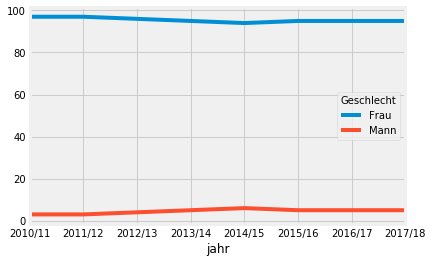

In [320]:
# Die Grafik. 
primar_gender.groupby(by=['jahr', primar_gender.index]).sum().unstack()['prozent'].plot()

In [322]:
# Wie hat sich das Geschlechterverhältnis auf der Sekundarstufe I in den letzten 10 Jahren entwickelt?
sekundar1_gender = pd.DataFrame()
for j in df['Schuljahr'].unique():
    df_temp = df[df['Schuljahr'] == j]
    df_temp = df_temp[df_temp['Bildungsstufe'].str.contains('Sekundarstufe I')]
    df_temp = df_temp[df_temp['Kanton'] == 'Schweiz']
    df_temp = df_temp.groupby(by='Geschlecht')[['DATA']].sum()
    df_temp['prozent'] = round(100 * df_temp['DATA'] / df_temp['DATA'].sum()).astype('int')
    df_temp['jahr'] = j
    sekundar1_gender = pd.concat([sekundar1_gender, df_temp])
sekundar1_gender.groupby(by=['jahr', sekundar1_gender.index]).sum()

DATA  prozent
jahr    Geschlecht                
2010/11 Frau        28544       48
        Mann        30871       52
2011/12 Frau        29414       49
        Mann        31017       51
2012/13 Frau        29643       49
        Mann        30725       51
2013/14 Frau        29250       49
        Mann        30162       51
2014/15 Frau        27963       49
        Mann        29257       51
2015/16 Frau        28067       49
        Mann        28927       51
2016/17 Frau        28327       50
        Mann        28516       50
2017/18 Frau        28746       50
        Mann        28396       50

In [323]:
# Wie hat sich das Geschlechterverhältnis auf der Sekundarstufe II in den letzten 10 Jahren entwickelt?
sekundar2_gender = pd.DataFrame()
for j in df['Schuljahr'].unique():
    df_temp = df[df['Schuljahr'] == j]
    df_temp = df_temp[df_temp['Bildungsstufe'].str.contains('Sekundarstufe II')]
    df_temp = df_temp[df_temp['Kanton'] == 'Schweiz']
    df_temp = df_temp.groupby(by='Geschlecht')[['DATA']].sum()
    df_temp['prozent'] = round(100 * df_temp['DATA'] / df_temp['DATA'].sum()).astype('int')
    df_temp['jahr'] = j
    sekundar2_gender = pd.concat([sekundar2_gender, df_temp])
sekundar2_gender.groupby(by=['jahr', sekundar2_gender.index]).sum()

DATA  prozent
jahr    Geschlecht                
2010/11 Frau         8812       40
        Mann        13259       60
2011/12 Frau         9184       41
        Mann        13457       59
2012/13 Frau         9231       41
        Mann        13391       59
2013/14 Frau         9444       41
        Mann        13446       59
2014/15 Frau         9504       41
        Mann        13455       59
2015/16 Frau         9473       42
        Mann        13079       58
2016/17 Frau         9732       43
        Mann        13035       57
2017/18 Frau        10157       43
        Mann        13238       57

In [343]:
# Aufschlüsseln nach Kantonen.
df_kantone = pd.DataFrame()
for k in df['Kanton'].unique():
    df_temp = df_aktuell[df_aktuell['Bildungsstufe'].str.contains('Total')]
    df_temp = df_temp[df_temp['Kanton'] == k]
    df_temp['prozent'] = round(100 * df_temp['DATA'] / df_temp['DATA'].sum()).astype('int')
    df_temp = df_temp[['Kanton', 'Geschlecht', 'DATA', 'prozent']].groupby(['Kanton', 'Geschlecht']).sum().unstack()
    df_kantone = pd.concat([df_kantone, df_temp])

In [346]:
# In welchen Kantonen ist der Frauenanteil im Lehrerberuf am höchsten? 
df_kantone['prozent']['Frau'].sort_values(ascending=False)

Kanton
Solothurn                           73
Luzern                              72
Fribourg / Freiburg                 72
Zürich                              71
Obwalden                            71
Nidwalden                           71
Schaffhausen                        71
Bern / Berne                        70
Basel-Landschaft                    69
Appenzell Ausserrhoden              69
Schweiz                             69
St. Gallen                          69
Aargau                              69
Thurgau                             69
Vaud                                69
Appenzell Innerrhoden               68
Zug                                 68
Schwyz                              68
Genève                              66
Basel-Stadt                         66
Graubünden / Grigioni / Grischun    66
Glarus                              66
Uri                                 65
Neuchâtel                           65
Ticino                              64
Valais / Wallis   

In [359]:
df_temp[df_temp['Schuljahr'] == j]

,Schuljahr,Kanton,Geschlecht,Bildungsstufe,DATA
572,2010/11,Jura,Mann,Bildungsstufe - Total,481
583,2010/11,Jura,Frau,Bildungsstufe - Total,726


In [395]:
# Aufschlüsseln nach Kantone, historische Entwicklung für alle Lehrer. 
df_kantone_historisch = pd.DataFrame()
for k in df['Kanton'].unique():
    df_temp2 = pd.DataFrame()
    for j in df['Schuljahr'].unique():
        df_temp = df[df['Kanton'] == k]
        df_temp = df_temp[df_temp['Bildungsstufe'].str.contains('Total')]
        df_temp = df_temp[df_temp['Schuljahr'] == j]
        df_temp['prozent'] = round(100 * df_temp['DATA'] / df_temp['DATA'].sum()).astype('int')
        df_temp = df_temp[['Kanton', 'Geschlecht', 'DATA', 'prozent']].groupby(['Kanton', 'Geschlecht']).sum().unstack()
        df_temp.columns = [j + '_nominal_w', j + '_nominal_m', j + '_prozent_w', j + '_prozent_m']
        df_temp2 = pd.concat([df_temp2, df_temp], axis=1)
    df_kantone_historisch = pd.concat([df_kantone_historisch, df_temp2])

In [413]:
# Historische Entwicklung auf Kantonsebene (Prozentwerte). 
prozent = [x for x in df_kantone_historisch.columns if 'prozent' in x]
df_temp = df_kantone_historisch[prozent]
df_temp = df_temp[[x for x in df_temp.columns if '_m' in x]]
df_temp

,2010/11_prozent_m,2011/12_prozent_m,2012/13_prozent_m,2013/14_prozent_m,2014/15_prozent_m,2015/16_prozent_m,2016/17_prozent_m,2017/18_prozent_m
Kanton,,,,,,,,
Schweiz,35,34,34,33,33,32,31,31
Zürich,34,34,34,33,32,30,29,29
Bern / Berne,35,34,33,33,32,31,31,30
Luzern,33,33,31,30,31,30,29,28
Uri,41,41,38,36,37,38,37,35
Schwyz,40,38,37,36,35,34,32,32
Obwalden,34,33,31,30,31,31,29,29
Nidwalden,33,32,31,30,31,30,30,29
Glarus,36,35,34,34,32,35,35,34


In [418]:
# Welche Kantone verzeichneten zwischen 2010 und 2017 den grössten Lehrerschwund? 
df_temp[['2010/11_prozent_m', '2017/18_prozent_m']].diff(axis=1).sort_values(by='2017/18_prozent_m')[['2017/18_prozent_m']]

,2017/18_prozent_m
Kanton,
Appenzell Innerrhoden,-10.0
Schwyz,-8.0
Basel-Landschaft,-6.0
Uri,-6.0
Graubünden / Grigioni / Grischun,-6.0
Zürich,-5.0
Bern / Berne,-5.0
Luzern,-5.0
Obwalden,-5.0


In [422]:
# Aufschlüsseln nach Kantone, historische Entwicklung für die Primarstufe. 
df_kantone_historisch_primarstufe = pd.DataFrame()
for k in df['Kanton'].unique():
    df_temp2 = pd.DataFrame()
    for j in df['Schuljahr'].unique():
        df_temp = df[df['Kanton'] == k]
        df_temp = df_temp[df_temp['Bildungsstufe'].str.contains('Primarstufe')]
        df_temp = df_temp[df_temp['Schuljahr'] == j]
        df_temp['prozent'] = round(100 * df_temp['DATA'] / df_temp['DATA'].sum()).astype('int')
        df_temp = df_temp[['Kanton', 'Geschlecht', 'DATA', 'prozent']].groupby(['Kanton', 'Geschlecht']).sum().unstack()
        df_temp.columns = [j + '_nominal_w', j + '_nominal_m', j + '_prozent_w', j + '_prozent_m']
        df_temp2 = pd.concat([df_temp2, df_temp], axis=1)
    df_kantone_historisch_primarstufe = pd.concat([df_kantone_historisch_primarstufe, df_temp2])

# Historische Entwicklung auf Kantonsebene (Prozentwerte) für die Lehrkräfte der Primarstufe. 
prozent = [x for x in df_kantone_historisch_primarstufe.columns if 'prozent' in x]
df_temp = df_kantone_historisch_primarstufe[prozent]
df_temp = df_temp[[x for x in df_temp.columns if '_m' in x]]
df_temp    

,2010/11_prozent_m,2011/12_prozent_m,2012/13_prozent_m,2013/14_prozent_m,2014/15_prozent_m,2015/16_prozent_m,2016/17_prozent_m,2017/18_prozent_m
Kanton,,,,,,,,
Schweiz,16,15,14,15,15,13,14,13
Zürich,15,15,14,14,13,11,12,12
Bern / Berne,16,15,15,14,13,13,13,12
Luzern,14,13,12,12,13,12,11,11
Uri,26,24,22,22,23,25,23,23
Schwyz,22,21,22,20,20,19,18,16
Obwalden,17,15,13,12,13,14,15,14
Nidwalden,18,16,17,17,14,16,15,14
Glarus,16,16,15,15,13,15,14,13


In [423]:
# Welche Kantone verzeichneten zwischen 2010 und 2017 den grössten Lehrerschwund auf der Primarstufe? 
df_temp[['2010/11_prozent_m', '2017/18_prozent_m']].diff(axis=1).sort_values(by='2017/18_prozent_m')[['2017/18_prozent_m']]

,2017/18_prozent_m
Kanton,
Appenzell Innerrhoden,-10.0
Ticino,-7.0
Graubünden / Grigioni / Grischun,-7.0
Schwyz,-6.0
Jura,-4.0
Bern / Berne,-4.0
Nidwalden,-4.0
St. Gallen,-4.0
Fribourg / Freiburg,-4.0
